In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [19]:
df = pd.read_csv("data/df_preprocessed_log_dummies.csv")

In [20]:
df.head()

,state,delta_dead_laun,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,AU,BE,CA,...,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
0,1,720.0,3,19,23,125,6.907755,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,720.0,0,7,51,108,9.615805,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1439.0,3,19,34,133,9.479141,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,720.0,0,21,40,121,7.937375,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,720.0,3,4,31,134,8.160518,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
# define features and target
X = df.drop('state', axis=1)
y = df['state']

In [22]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [23]:
def train(X_train, y_train, X_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [24]:
def evaluate(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True)

In [25]:
# train DecistionTree
tree = DecisionTreeClassifier()
y_pred_tree = train(X_train, y_train, X_test, tree)

              precision    recall  f1-score   support

           0       0.58      0.56      0.57     22427
           1       0.73      0.75      0.74     35372

    accuracy                           0.67     57799
   macro avg       0.66      0.65      0.65     57799
weighted avg       0.67      0.67      0.67     57799



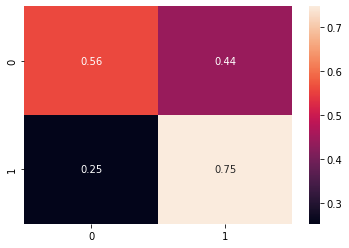

In [36]:
# evaluate tree
evaluate(y_test, y_pred_tree)

In [35]:
# get parameter
print(f'depth: {tree.get_depth()}')

depth: 53


In [37]:
f1_score(y_test, y_pred_tree)

0.7375113279888463

In [38]:
roc_auc_score(y_test, y_pred_tree)

0.6530638826982959

In [39]:
# train svm
svm = SVC(max_iter=1000)
y_pred_svm = train(X_train, y_train, X_test, svm)

/Users/laurenthartmann/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      0.05      0.09     22427
           1       0.61      0.93      0.74     35372

    accuracy                           0.59     57799
   macro avg       0.47      0.49      0.41     57799
weighted avg       0.50      0.59      0.49     57799



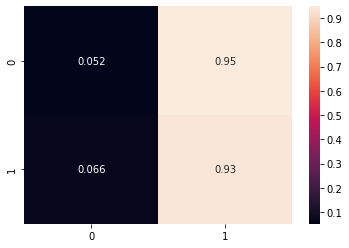

In [40]:
# evaluate svm
evaluate(y_test, y_pred_svm)

In [41]:
# train random forest
forest = RandomForestClassifier(max_depth=10)
y_pred_forest = train(X_train, y_train, X_test, forest)

              precision    recall  f1-score   support

           0       0.73      0.38      0.50     22427
           1       0.70      0.91      0.79     35372

    accuracy                           0.70     57799
   macro avg       0.71      0.65      0.64     57799
weighted avg       0.71      0.70      0.68     57799



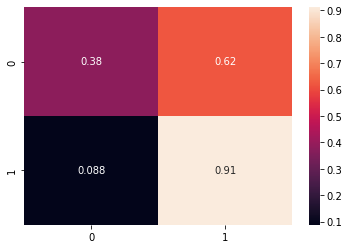

In [42]:
# evaluate random forest
evaluate(y_test, y_pred_forest)

In [44]:
# gridsearch with random forest
forest_params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [50, 100, 150],
    'min_samples_split': [50, 100, 200]
}

grid_forest = GridSearchCV(forest, param_grid=forest_params, n_jobs=-1, cv=5, scoring='f1', verbose=2)

In [45]:
grid_forest.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=100; total time=  30.2s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=100; total time=  30.3s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=100; total time=  30.3s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=100; total time=  30.4s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=100; total time=  30.5s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=200; total time=  58.0s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=200; total time=  58.2s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=200; total time=  58.3s
[CV] END criterion=gini, max_depth=50, min_samples_split=100, n_estimators=100; total time=  25.1s
[CV] END criterion=gini, max_depth=50, min_samples_spli

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [50, 100, 150],
                         'min_samples_split': [50, 100, 200],
                         'n_estimators': [100, 200, 500]},
             scoring='f1', verbose=2)

In [49]:
best_forest = grid_forest.best_estimator_

In [50]:
grid_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'min_samples_split': 50,
 'n_estimators': 200}

In [51]:
# predict with best random forest
y_pred_bestforest = best_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.71      0.50      0.59     22427
           1       0.73      0.87      0.80     35372

    accuracy                           0.73     57799
   macro avg       0.72      0.69      0.69     57799
weighted avg       0.72      0.73      0.72     57799



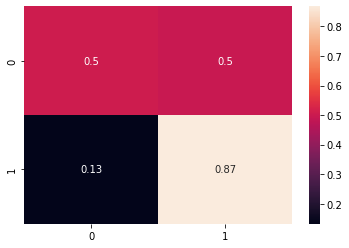

In [52]:
# evaluate best forest
evaluate(y_test, y_pred_bestforest)

In [53]:
f1_score(y_test, y_pred_bestforest)

0.7955688002073076

In [54]:
roc_auc_score(y_test, y_pred_bestforest)

0.6863475693193655

In [55]:
# train adjusted random forest
forest_adj = RandomForestClassifier(max_depth=100, n_estimators=200, min_samples_split=50)
y_pred_forestadj = train(X_train, y_train, X_test, forest_adj)

              precision    recall  f1-score   support

           0       0.71      0.51      0.59     22427
           1       0.74      0.87      0.80     35372

    accuracy                           0.73     57799
   macro avg       0.72      0.69      0.69     57799
weighted avg       0.72      0.73      0.72     57799



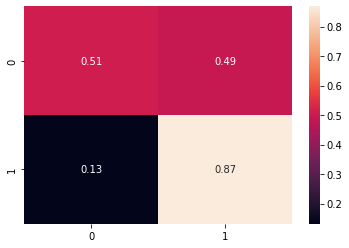

In [56]:
# evaluate adjusted forest
evaluate(y_test, y_pred_forestadj)

In [57]:
roc_auc_score(y_test, y_pred_forestadj)

0.6873339344904924

## Error analysis

In [ ]:
error_df = pd.read_csv("data/df_eda2.csv")

In [ ]:
# replace state values with 0s and 1s
error_df['state'].replace(to_replace={'successful': 1, 'failed': 0}, inplace=True)

In [ ]:
error_df.head()

,country,state,goal_usd_log,name_len,category,delta_dead_laun
0,US,1,6.907755,23,"""slug"":""games/playing cards""",720.0
1,US,1,9.615805,51,"""slug"":""music/rock""",720.0
2,GB,0,9.479141,34,"""slug"":""games/playing cards""",1439.0
3,US,1,7.937375,40,"""slug"":""publishing/nonfiction""",720.0
4,US,1,8.160518,31,"""slug"":""music/classical music""",720.0


In [ ]:
X2 = error_df.drop('state', axis=1)
y2 = error_df['state']

In [ ]:
# split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42, test_size=0.3)

In [ ]:
features = pd.DataFrame(X_test2)

In [ ]:
features = features.reset_index()

In [ ]:
state = y_test2.reset_index()

In [ ]:
state_pred = pd.DataFrame(y_pred_forestadj)

In [ ]:
df_error = pd.concat([features, state_pred, state], axis=1)

In [ ]:
df_error.rename(columns={0: 'state_pred'}, inplace=True)

In [ ]:
false_pos = df_error.query('state == 0 and state_pred == 1')

In [ ]:
false_neg = df_error.query('state == 1 and state_pred == 0')

<AxesSubplot:xlabel='name_len', ylabel='Count'>

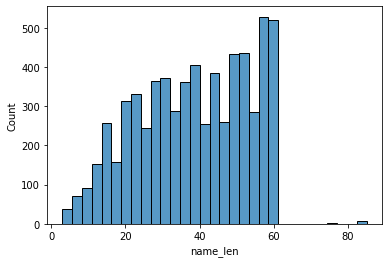

In [ ]:
sns.histplot(data=false_pos, x='name_len')

<AxesSubplot:xlabel='country', ylabel='Count'>

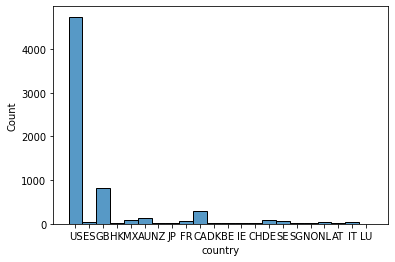

In [ ]:
sns.histplot(data=false_pos, x='country')

<AxesSubplot:xlabel='goal_usd_log', ylabel='Count'>

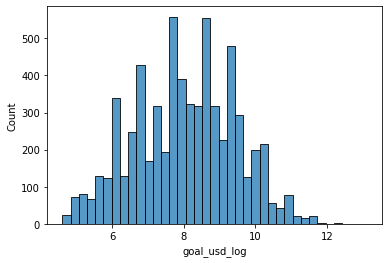

In [ ]:
sns.histplot(data=false_pos, x='goal_usd_log')

<AxesSubplot:xlabel='category', ylabel='Count'>

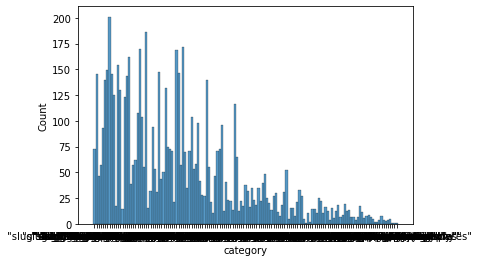

In [ ]:
sns.histplot(data=false_pos, x='category')

<AxesSubplot:xlabel='delta_dead_laun', ylabel='Count'>

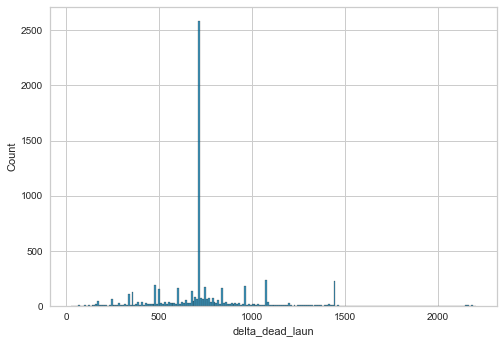

In [ ]:
sns.histplot(data=false_pos, x='delta_dead_laun')

<AxesSubplot:xlabel='name_len', ylabel='Count'>

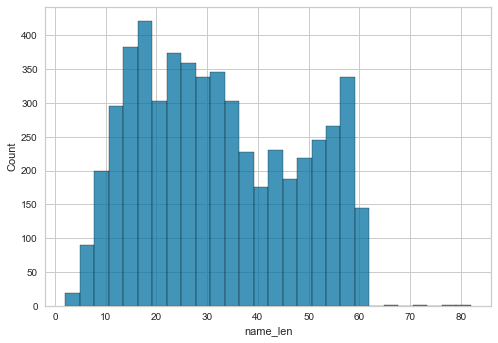

In [ ]:
sns.histplot(data=false_neg, x='name_len')

<AxesSubplot:xlabel='country', ylabel='Count'>

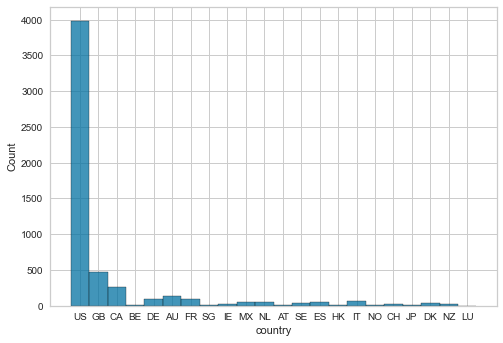

In [ ]:
sns.histplot(data=false_neg, x='country')

<AxesSubplot:xlabel='goal_usd_log', ylabel='Count'>

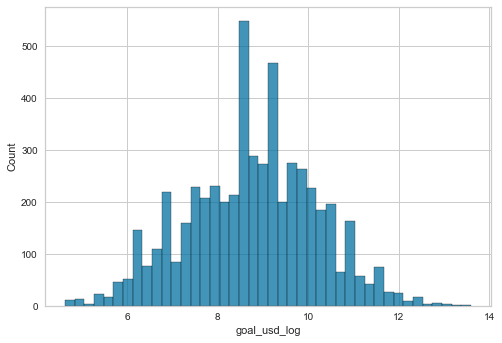

In [ ]:
sns.histplot(data=false_neg, x='goal_usd_log')

<AxesSubplot:xlabel='category', ylabel='Count'>

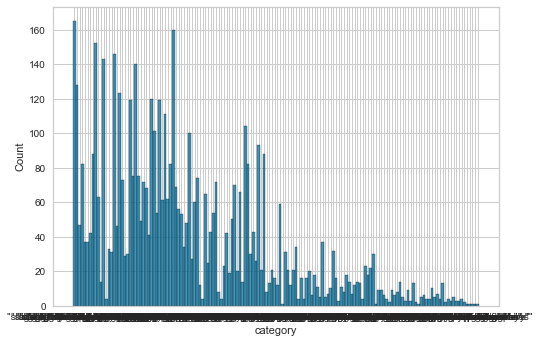

In [ ]:
sns.histplot(data=false_neg, x='category')

<AxesSubplot:xlabel='delta_dead_laun', ylabel='Count'>

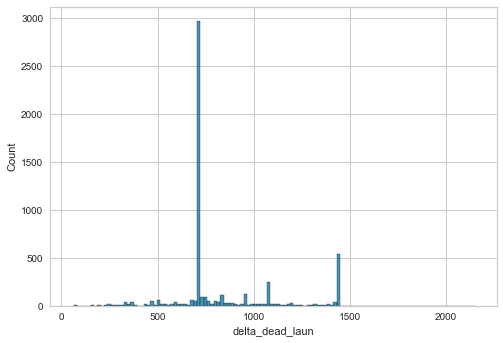

In [ ]:
sns.histplot(data=false_neg, x='delta_dead_laun')

In [ ]:
X.columns

Index(['goal_usd_log', 'name_len', 'delta_dead_laun', 'AU', 'BE', 'CA', 'CH',
       'DE', 'DK', 'ES',
       ...
       '"slug":"technology/wearables"', '"slug":"technology/web"',
       '"slug":"theater"', '"slug":"theater/comedy"',
       '"slug":"theater/experimental"', '"slug":"theater/festivals"',
       '"slug":"theater/immersive"', '"slug":"theater/musical"',
       '"slug":"theater/plays"', '"slug":"theater/spaces"'],
      dtype='object', length=192)

<BarContainer object of 42 artists>

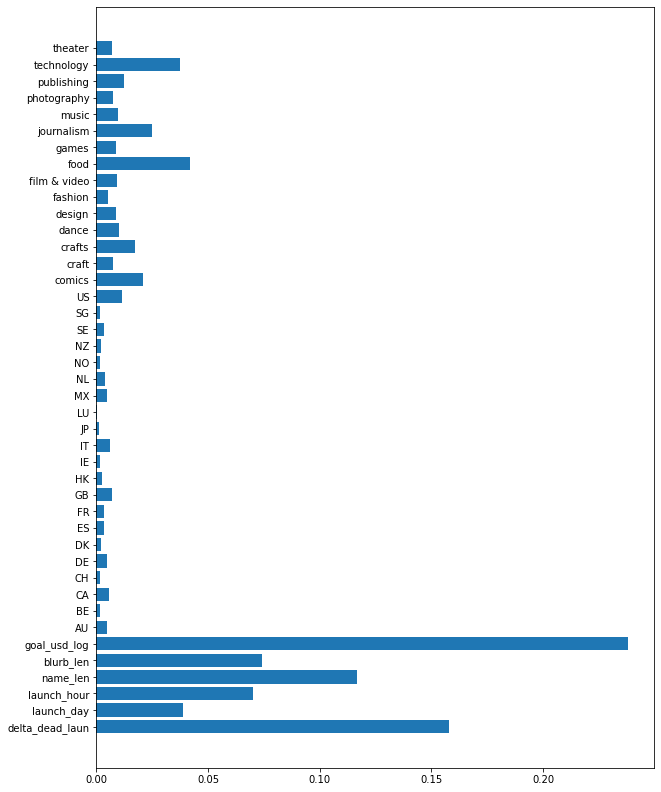

In [59]:
plt.figure(figsize=(10, 14))
plt.barh(X.columns, forest_adj.feature_importances_)